In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
#plot pretty graphs
font = {'family' : 'serif',
'weight' : 'normal',
'size' : 25}


plt.rc('font', **font)
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [3]:
# import all data
e64wat_data = np.loadtxt("64wat-nnp-energies-1.txt")
e64wat_ener = np.loadtxt("64wat-1-ener.txt")
e64wat_ener_aimd = np.loadtxt("AIMD-ener.txt")

In [4]:
# create all data from the .txt file
e64wat_avg = e64wat_data[:,0]
e64wat_std = e64wat_data[:,1]

temp64wat = e64wat_ener[:,3]
time64wat = e64wat_ener[:,-1]

e64wat_aimd = e64wat_ener_aimd[:,5]
temp64wat_aimd = e64wat_ener_aimd[:,3]
time64wat_aimd = e64wat_ener_aimd[:,-1]

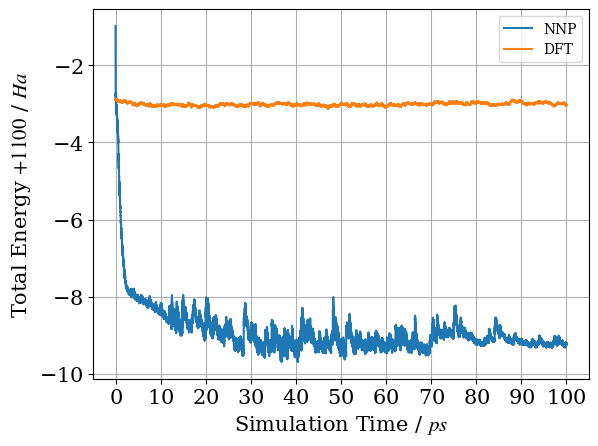

In [16]:
# plot energy evolution
plt.plot(np.arange(0,100.001,0.001), e64wat_avg+1100, label='NNP')
plt.plot(np.arange(0,100.001,0.001), e64wat_aimd[:100001]+1100, label='DFT')
plt.xticks(np.arange(0,100.001, 10))
plt.xlabel('Simulation Time / $ps$')
plt.ylabel('Total Energy $+1100$ / $Ha$')
plt.legend(loc=1, fontsize=10)
plt.grid()
plt.savefig('ener.png')

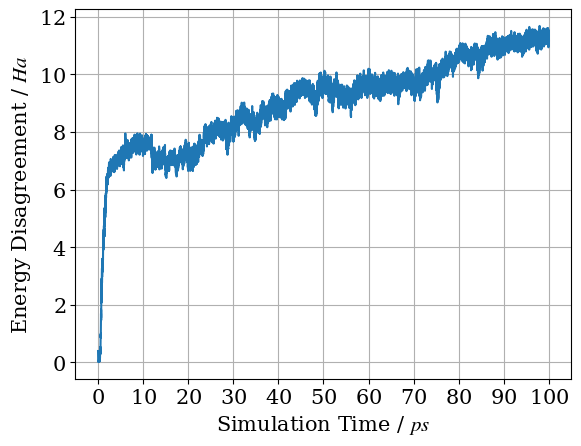

In [13]:
# plot energy committee disagreement
plt.plot(np.arange(0,100.001,0.001), e64wat_std)
plt.xticks(np.arange(0,100.001, 10))
plt.xlabel('Simulation Time / $ps$')
plt.ylabel('Energy Disagreement / $Ha$')
plt.grid()
plt.savefig('ener-dev.png')

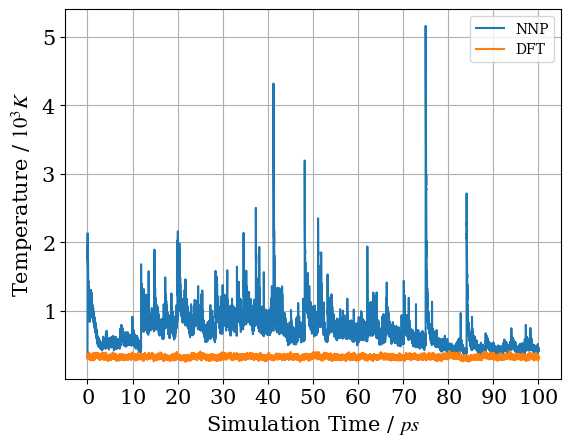

In [15]:
# plot temperature fluctuation
plt.plot(np.arange(0,100.001,0.001), temp64wat/1000, label='NNP')
plt.plot(np.arange(0,100.001,0.001), temp64wat_aimd[:100001]/1000, label='DFT')
plt.xticks(np.arange(0,100.001, 10))
plt.legend(loc=1, fontsize=10)
plt.xlabel('Simulation Time / $ps$')
plt.ylabel('Temperature / $10 ^3 K$')
plt.grid()
plt.savefig('temp.png')

In [8]:
# plot the sampling done with QbC
selected_frames = []
with open('input.txt', 'r') as f:
    for line in f.readlines():
        if 'i = ' in line:
            selected_frames.append(line.split()[3])

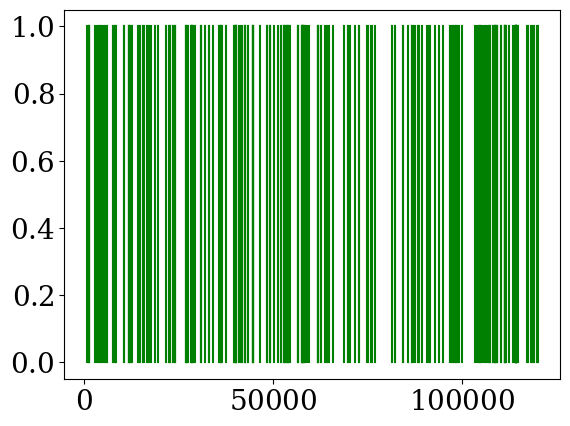

In [9]:
# green lines are the samples, x axis for the frames, y axis has no meaning
for frame in selected_frames:
    plt.plot([int(frame[:-1]), int(frame[:-1])], [0,1], color='g')